## Bank Customer Churn Prediction By Gaurav Vashist

#### In this project, we aim to build a robust Support Vector Machine (SVM) classifier for a given dataset. 
#### We'll delve into key data preprocessing steps, including Data Encoding to convert categorical variables, Feature Scaling for normalization, and addressing Imbalanced Data issues. Our focus is on optimizing the SVM model through Grid Search for Hyperparameter tuning, ensuring the best performance. Throughout this journey, we'll provide a comprehensive understanding of each concept, empowering you to navigate the intricacies of data preprocessing and model optimization.

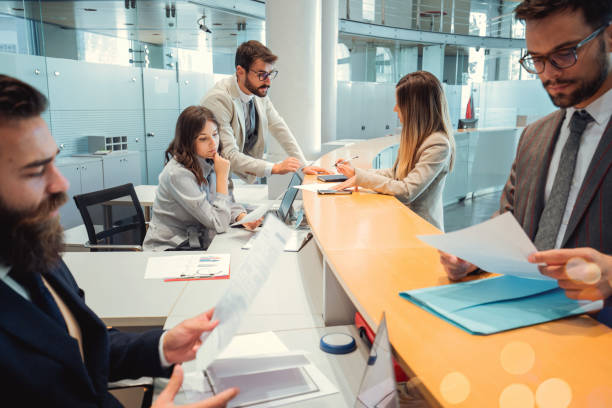

In [1]:
from IPython.display import display, Image

image_path = "C:/Users/gaura/Downloads/Pictures/Saved Pictures/Bank.jpg"
image_width = 1000

# Display the image with the specified width
display(Image(filename=image_path, width=image_width))



### Import the Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Import the Data Set

In [3]:
# Provide the raw URL of the CSV file
url = "https://github.com/YBI-Foundation/Dataset/raw/main/Bank%20Churn%20Modelling.csv"

# Read the CSV file into a DataFrame
df = pd.read_csv(url)

# Display the first few rows of the DataFrame
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### Analysis of Data

In [4]:
df.head(10)

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerId        10000 non-null  int64  
 1   Surname           10000 non-null  object 
 2   CreditScore       10000 non-null  int64  
 3   Geography         10000 non-null  object 
 4   Gender            10000 non-null  object 
 5   Age               10000 non-null  int64  
 6   Tenure            10000 non-null  int64  
 7   Balance           10000 non-null  float64
 8   Num Of Products   10000 non-null  int64  
 9   Has Credit Card   10000 non-null  int64  
 10  Is Active Member  10000 non-null  int64  
 11  Estimated Salary  10000 non-null  float64
 12  Churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


In [6]:
df.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [7]:
df.shape

(10000, 13)

In [8]:
df.duplicated('CustomerId').sum()

0

In [9]:
df=df.set_index("CustomerId")

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 15634602 to 15628319
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Surname           10000 non-null  object 
 1   CreditScore       10000 non-null  int64  
 2   Geography         10000 non-null  object 
 3   Gender            10000 non-null  object 
 4   Age               10000 non-null  int64  
 5   Tenure            10000 non-null  int64  
 6   Balance           10000 non-null  float64
 7   Num Of Products   10000 non-null  int64  
 8   Has Credit Card   10000 non-null  int64  
 9   Is Active Member  10000 non-null  int64  
 10  Estimated Salary  10000 non-null  float64
 11  Churn             10000 non-null  int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 1015.6+ KB


In [11]:
df.isnull().sum()

Surname             0
CreditScore         0
Geography           0
Gender              0
Age                 0
Tenure              0
Balance             0
Num Of Products     0
Has Credit Card     0
Is Active Member    0
Estimated Salary    0
Churn               0
dtype: int64

### Encoding

In [12]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [13]:
df.replace({ 'Geography':{'France':2,'Germany':1, 'Spain':0}}, inplace=True)

In [14]:
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [15]:
df.replace({'Gender':{'Male':0,'Female':1}},inplace=True)

In [16]:
df['Num Of Products'].value_counts()

1    5084
2    4590
3     266
4      60
Name: Num Of Products, dtype: int64

In [17]:
df.replace({'Num Of Products':{1:0,2:1,3:1,4:1}}, inplace=True)

In [18]:
df['Has Credit Card'].value_counts()

1    7055
0    2945
Name: Has Credit Card, dtype: int64

In [19]:
df['Is Active Member'].value_counts()

1    5151
0    4849
Name: Is Active Member, dtype: int64

In [20]:
df.loc[(df['Balance']==0),'Churn'].value_counts()

0    3117
1     500
Name: Churn, dtype: int64

In [21]:
df['Zero Balance']=np.where(df['Balance']>0,1,0)

<Axes: >

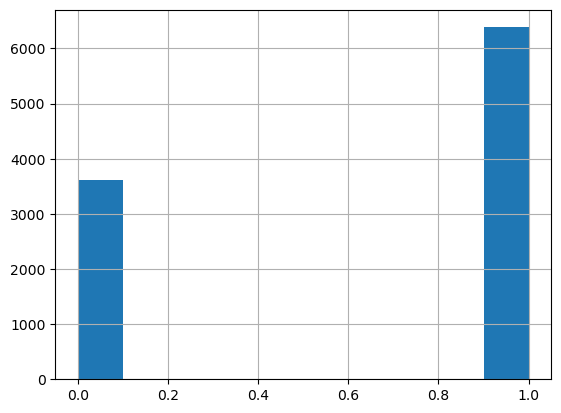

In [22]:
df['Zero Balance'].hist()

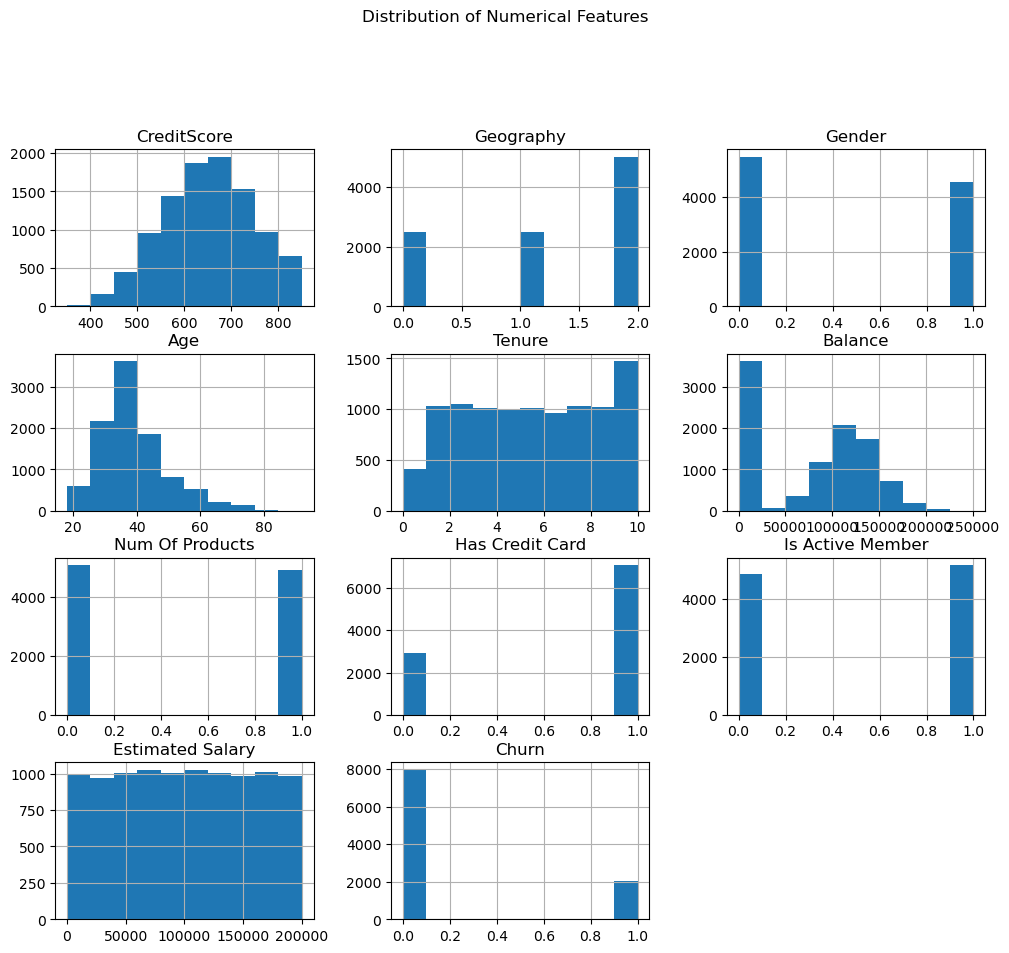

In [88]:
numeric_features = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_features].hist(figsize=(12, 10))
plt.suptitle('Distribution of Numerical Features', y=1.02)
plt.show()

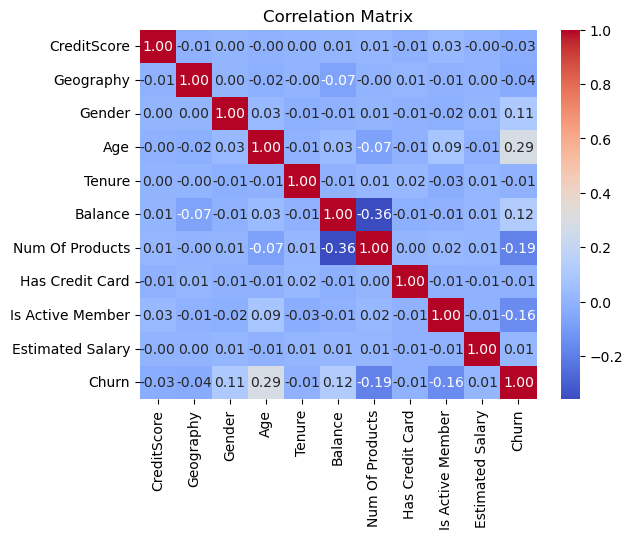

In [89]:
# Explore the correlation between numerical features
correlation_matrix = df[numeric_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [23]:
df.groupby(['Churn','Geography']).count()

Surname  CreditScore  Gender   Age  Tenure  Balance  \
Churn Geography                                                        
0     0             2064         2064    2064  2064    2064     2064   
      1             1695         1695    1695  1695    1695     1695   
      2             4204         4204    4204  4204    4204     4204   
1     0              413          413     413   413     413      413   
      1              814          814     814   814     814      814   
      2              810          810     810   810     810      810   

                 Num Of Products  Has Credit Card  Is Active Member  \
Churn Geography                                                       
0     0                     2064             2064              2064   
      1                     1695             1695              1695   
      2                     4204             4204              4204   
1     0                      413              413               413   
      1                      814              814               814   
      2                      810              810               810   

                 Estimated Salary  Zero Balance  
Churn Geography                                  
0     0                      2064          2064  
      1                      1695          1695  
      2                      4204          4204  
1     0                       413           413  
      1                       814           814  
      2                       810           810

### Define Label and Features

In [24]:
df.columns

Index(['Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'Num Of Products', 'Has Credit Card', 'Is Active Member',
       'Estimated Salary', 'Churn', 'Zero Balance'],
      dtype='object')

In [25]:
x = df.drop(['Surname','Churn'], axis=1)

In [26]:
y= df['Churn']

In [27]:
x.shape,y.shape

((10000, 11), (10000,))

### Handling Imabalance Data



In the Bank Churn Model, handling imbalanced data is crucial for accurate predictions. Imbalance often occurs when one class (e.g., churners) significantly outnumbers another. Addressing this imbalance enhances model performance, particularly in scenarios such as fraud detection, spam filtering, disease screening, online sales churn prediction, and advertising click-through prediction. Proper handling of imbalanced data ensures that the model doesn't bias towards the majority class, resulting in more reliable insights and predictions for critical applications like fraud prevention and targeted marketing. Techniques like oversampling, undersampling, and synthetic data generation, such as SMOTE, play a pivotal role in achieving balanced and effective models.

In [28]:
df['Churn'].value_counts()

0    7963
1    2037
Name: Churn, dtype: int64

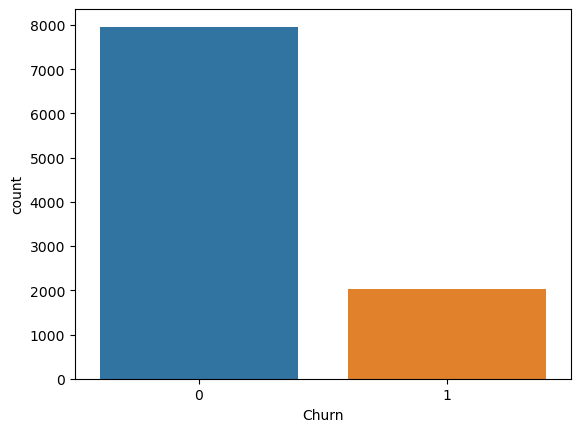

In [29]:
sns.countplot(x='Churn',data=df);

In [30]:
x.shape, y.shape

((10000, 11), (10000,))

### Random Under Sampling

In [31]:
!pip install --upgrade scikit-learn
!pip install --upgrade imbalanced-learn


In [32]:
from imblearn.under_sampling import RandomUnderSampler

In [33]:
rus = RandomUnderSampler(random_state=2529)

In [34]:
x_rus, y_rus =rus.fit_resample(x,y)

In [35]:
y.value_counts()

0    7963
1    2037
Name: Churn, dtype: int64

In [36]:
y_rus.value_counts()

0    2037
1    2037
Name: Churn, dtype: int64

<Axes: ylabel='Frequency'>

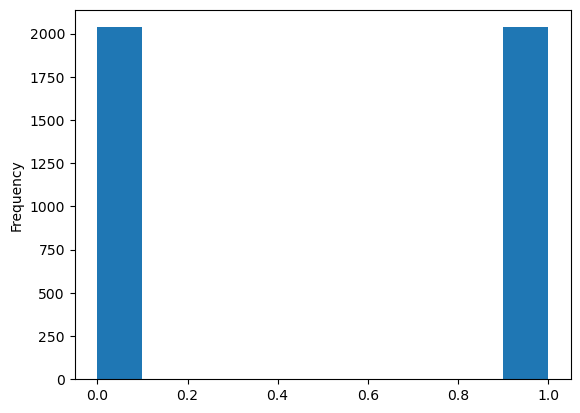

In [37]:
y_rus.plot(kind='hist')

### Random Over Sampling

In [38]:
from imblearn.over_sampling import RandomOverSampler

In [39]:
ros = RandomOverSampler(random_state=2529)

In [40]:
x_ros,y_ros = ros.fit_resample(x,y)

In [41]:
x_ros.shape, y_ros.shape, x.shape, y.shape

((15926, 11), (15926,), (10000, 11), (10000,))

In [42]:
y.value_counts()

0    7963
1    2037
Name: Churn, dtype: int64

In [43]:
y_ros.value_counts()

1    7963
0    7963
Name: Churn, dtype: int64

<Axes: ylabel='Frequency'>

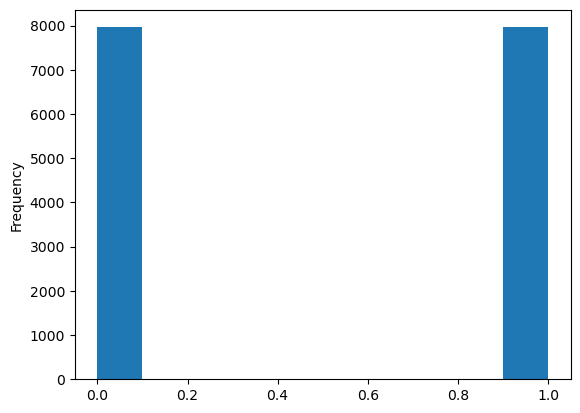

In [44]:
y_ros.plot(kind='hist')

### Train Test Split

In [45]:
from sklearn.model_selection import train_test_split

### Split for the Orginal data

In [46]:
x_train,x_test,y_train,y_test= train_test_split(x,y, test_size=0.3,random_state=2529)

### Split Random Under Sample Data

In [47]:
x_train_rus,x_test_rus,y_train_rus,y_test_rus= train_test_split(x_rus,y_rus, test_size=0.3,random_state=2529)

### Split Random Over Sampling

In [48]:
x_train_ros,x_test_ros,y_train_ros,y_test_ros= train_test_split(x_ros,y_ros, test_size=0.3,random_state=2529)

## Satandardize Feature

In [49]:
from sklearn.preprocessing import StandardScaler

In [50]:
sc= StandardScaler()

### Standardize Original data

In [51]:
x_train[['CreditScore','Age','Tenure','Balance','Estimated Salary']] = sc.fit_transform(x_train[['CreditScore','Age','Tenure','Balance','Estimated Salary']])

In [52]:
x_test[['CreditScore','Age','Tenure','Balance','Estimated Salary']]=sc.fit_transform(x_test[['CreditScore','Age','Tenure','Balance','Estimated Salary']])

### Standardized Random Under Sample Data

In [53]:
x_train_rus[['CreditScore','Age','Tenure','Balance','Estimated Salary']] = sc.fit_transform(x_train_rus[['CreditScore','Age','Tenure','Balance','Estimated Salary']])

In [54]:
x_test_rus[['CreditScore','Age','Tenure','Balance','Estimated Salary']]= sc.fit_transform(x_test_rus[['CreditScore','Age','Tenure','Balance','Estimated Salary']])

### Satndardized Random Over Sampling Data 

In [55]:
x_train_ros[['CreditScore','Age','Tenure','Balance','Estimated Salary']]= sc.fit_transform(x_train_ros[['CreditScore','Age','Tenure','Balance','Estimated Salary']])

In [56]:
x_test_ros[['CreditScore','Age','Tenure','Balance','Estimated Salary']]= sc.fit_transform(x_test_ros[['CreditScore','Age','Tenure','Balance','Estimated Salary']])

### Support Vector Classifier

In [57]:
from sklearn.svm import SVC


In [58]:
svc= SVC()

In [59]:
svc.fit(x_train,y_train)

SVC()

In [60]:
y_pred = svc.predict(x_test)

### Model Accuracy

In [61]:
from sklearn.metrics import confusion_matrix, classification_report


In [62]:
confusion_matrix(y_test,y_pred)

array([[2381,   33],
       [ 436,  150]], dtype=int64)

In [63]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.99      0.91      2414
           1       0.82      0.26      0.39       586

    accuracy                           0.84      3000
   macro avg       0.83      0.62      0.65      3000
weighted avg       0.84      0.84      0.81      3000



### Hyperparameter Tunning

In [64]:
from sklearn.model_selection import GridSearchCV

In [65]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
import numpy as np

# Assuming you have defined param_grid
param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf'], 'gamma': [0.01, 0.1, 1],'class_weight':['balanced']}

# Create an SVC instance
svc_classifier = SVC()

# Create GridSearchCV instance
grid = GridSearchCV(svc_classifier, param_grid, refit=True, verbose=2, cv=2)

# Fit the grid search to the data
grid.fit(x_train, y_train)

# Get the best parameters and best estimator
best_params = grid.best_params_
best_estimator = grid.best_estimator_

# Print the best parameters
print("Best Parameters:")
print(best_params)

# You can use the best estimator for predictions
y_pred = best_estimator.predict(x_test)

# Evaluate the performance of the best estimator
# (e.g., using confusion matrix and classification report)


Fitting 2 folds for each of 18 candidates, totalling 36 fits
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=linear; total time=   1.2s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=linear; total time=   1.2s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   3.6s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   3.6s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=linear; total time=   1.2s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=linear; total time=   1.2s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   3.2s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   3.2s
[CV] END C=0.1, class_weight=balanced, gamma=1, kernel=linear; total time=   1.4s
[CV] END C=0.1, class_weight=balanced, gamma=1, kernel=linear; total time=   1.3s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   4.7s
[CV] END ..C=0.1, class_weight

In [66]:
grid_predictions = grid.predict(x_test)


In [67]:
confusion_matrix(y_test,grid_predictions)

array([[2159,  255],
       [ 343,  243]], dtype=int64)

In [68]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

           0       0.86      0.89      0.88      2414
           1       0.49      0.41      0.45       586

    accuracy                           0.80      3000
   macro avg       0.68      0.65      0.66      3000
weighted avg       0.79      0.80      0.79      3000



### Model with Random Under Sampling

In [69]:
svc_rus = SVC()

In [70]:
svc_rus.fit(x_train_rus,y_train_rus)

SVC()

In [71]:
y_pred_rus = svc_rus.predict(x_test_rus)

### Model Accuracy

In [72]:
confusion_matrix(y_test_rus,y_pred_rus)

array([[470, 157],
       [174, 422]], dtype=int64)

In [73]:
print(classification_report(y_test_rus,y_pred_rus))

              precision    recall  f1-score   support

           0       0.73      0.75      0.74       627
           1       0.73      0.71      0.72       596

    accuracy                           0.73      1223
   macro avg       0.73      0.73      0.73      1223
weighted avg       0.73      0.73      0.73      1223



In [74]:
# Assuming you have defined param_grid
param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf'], 'gamma': [0.01, 0.1, 1],'class_weight':['balanced']}

# Create an SVC instance
svc_classifier = SVC()

# Create GridSearchCV instance
grid = GridSearchCV(svc_classifier, param_grid, refit=True, verbose=2, cv=2)

# Fit the grid search to the data
grid.fit(x_train_rus, y_train_rus)

# Get the best parameters and best estimator
best_params = grid.best_params_
best_estimator = grid.best_estimator_

# Print the best parameters
print("Best Parameters:")
print(best_params)

# You can use the best estimator for predictions
y_pred_rus = best_estimator.predict(x_test_rus)

# Evaluate the performance of the best estimator
# (e.g., using confusion matrix and classification report)


Fitting 2 folds for each of 18 candidates, totalling 36 fits
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=linear; total time=   0.1s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=linear; total time=   0.1s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.6s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.6s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=linear; total time=   0.1s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=linear; total time=   0.1s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.5s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.5s
[CV] END C=0.1, class_weight=balanced, gamma=1, kernel=linear; total time=   0.1s
[CV] END C=0.1, class_weight=balanced, gamma=1, kernel=linear; total time=   0.1s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.6s
[CV] END ..C=0.1, class_weight

In [75]:
grid_predictions = grid.predict(x_test_rus)

In [76]:
confusion_matrix(y_test_rus,grid_predictions)

array([[476, 151],
       [172, 424]], dtype=int64)

In [77]:
print(classification_report(y_test_rus,grid_predictions))

              precision    recall  f1-score   support

           0       0.73      0.76      0.75       627
           1       0.74      0.71      0.72       596

    accuracy                           0.74      1223
   macro avg       0.74      0.74      0.74      1223
weighted avg       0.74      0.74      0.74      1223



### Model with Over sampling

In [78]:
svc_ros = SVC()

In [79]:
svc_ros.fit(x_train_ros,y_train_ros)

SVC()

In [80]:
y_pred_ros =  svc_ros.predict(x_test_ros)

### Model Accuracy

In [81]:
confusion_matrix(y_test_ros,y_pred_ros)

array([[1823,  556],
       [ 626, 1773]], dtype=int64)

In [82]:
print(classification_report(y_test_ros,y_pred_ros))

              precision    recall  f1-score   support

           0       0.74      0.77      0.76      2379
           1       0.76      0.74      0.75      2399

    accuracy                           0.75      4778
   macro avg       0.75      0.75      0.75      4778
weighted avg       0.75      0.75      0.75      4778



In [83]:
# Assuming you have defined param_grid
param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf'], 'gamma': [0.01, 0.1, 1], 'class_weight':['balanced']}

# Create an SVC instance
svc_classifier = SVC()

# Create GridSearchCV instance
grid = GridSearchCV(svc_classifier, param_grid, refit=True, verbose=2, cv=2)

# Fit the grid search to the data
grid.fit(x_train_ros, y_train_ros)

# Get the best parameters and best estimator
best_params = grid.best_params_
best_estimator = grid.best_estimator_

# Print the best parameters
print("Best Parameters:")
print(best_params)

# You can use the best estimator for predictions
y_pred_ros = best_estimator.predict(x_test_ros)

# Evaluate the performance of the best estimator
# (e.g., using confusion matrix and classification report)

Fitting 2 folds for each of 18 candidates, totalling 36 fits
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=linear; total time=   3.9s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=linear; total time=   3.4s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   9.3s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   9.1s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=linear; total time=   3.4s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=linear; total time=   3.2s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   8.2s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   7.9s
[CV] END C=0.1, class_weight=balanced, gamma=1, kernel=linear; total time=   3.3s
[CV] END C=0.1, class_weight=balanced, gamma=1, kernel=linear; total time=   3.3s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=  11.8s
[CV] END ..C=0.1, class_weight

In [84]:
grid_predictions = grid.predict(x_test_ros)

In [85]:
confusion_matrix(y_test_ros,grid_predictions)

array([[2047,  332],
       [  68, 2331]], dtype=int64)

In [86]:
print(classification_report(y_test_ros,grid_predictions))

              precision    recall  f1-score   support

           0       0.97      0.86      0.91      2379
           1       0.88      0.97      0.92      2399

    accuracy                           0.92      4778
   macro avg       0.92      0.92      0.92      4778
weighted avg       0.92      0.92      0.92      4778

